In [107]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,f1_score,accuracy_score,roc_auc_score

In [9]:
df = pd.read_csv('creditcard_2023.csv',index_col=0)

In [10]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     568630 

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.323544e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.197521e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.838678e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.069287e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,9.116859e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062
V10,568630.0,1.991314e-16,1.000001,-3.163276,-0.590101,0.262614,0.592460,31.722709


In [31]:
pd.DataFrame(df.corr()['Class']).style.background_gradient(cmap='viridis')

,Class
V1,-0.505761
V2,0.491878
V3,-0.682095
V4,0.735981
V5,-0.338639
V6,-0.435088
V7,-0.491234
V8,0.144294
V9,-0.585522
V10,-0.673665


In [36]:
max_list = [df[col].max() for col in df.columns]

In [38]:
print(max_list)

[2.22904613004356, 4.361865196721416, 14.125833911866232, 3.201535546069201, 42.716890639914205, 26.168402294404643, 217.873038474627, 5.958040147327273, 20.270062075837107, 31.72270910795672, 2.5135727491214537, 17.913556111364983, 7.187485954748435, 19.169544406102982, 14.532202180325108, 46.652906044046794, 6.994124024684426, 6.783716009168727, 3.8316716979071006, 29.872812160323736, 8.087080028016498, 12.63251122579015, 31.70762657825351, 12.965638661146754, 14.621509105774306, 5.623285408193404, 113.23109281324442, 77.25593674214326, 24039.93, 1]


In [42]:
#all values in range of float16
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('float16')
    else:
        df[col] = df[col].astype('int8')

In [40]:
df['V1'].dtype == 'float64'

True

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float16
 1   V2      568630 non-null  float16
 2   V3      568630 non-null  float16
 3   V4      568630 non-null  float16
 4   V5      568630 non-null  float16
 5   V6      568630 non-null  float16
 6   V7      568630 non-null  float16
 7   V8      568630 non-null  float16
 8   V9      568630 non-null  float16
 9   V10     568630 non-null  float16
 10  V11     568630 non-null  float16
 11  V12     568630 non-null  float16
 12  V13     568630 non-null  float16
 13  V14     568630 non-null  float16
 14  V15     568630 non-null  float16
 15  V16     568630 non-null  float16
 16  V17     568630 non-null  float16
 17  V18     568630 non-null  float16
 18  V19     568630 non-null  float16
 19  V20     568630 non-null  float16
 20  V21     568630 non-null  float16
 21  V22     568630 

In [101]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [48]:
#sampling 1/10 of dataset for eda
eda_df = df.sample(frac=0.1)

In [82]:
#divide vis into 2 parts
def plot_box_1(df):
    numerical_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//3
    ncols = 3
    fig, axes = plt.subplots(figsize=(40,40),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//3
        col = i%3
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.boxplot(x='Class',y=column,data=df,palette='rocket', linewidth=2.5, saturation=0.9,ax=ax,width=0.55)
        ax.set_title(f'Boxplot of {column}', color='white', fontsize=22, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=18)
        ax.set_ylabel('Values', color='white', fontsize=18)
        
        ax.tick_params(axis='x', colors='white', labelsize=17)
        ax.tick_params(axis='y', colors='white', labelsize=17)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

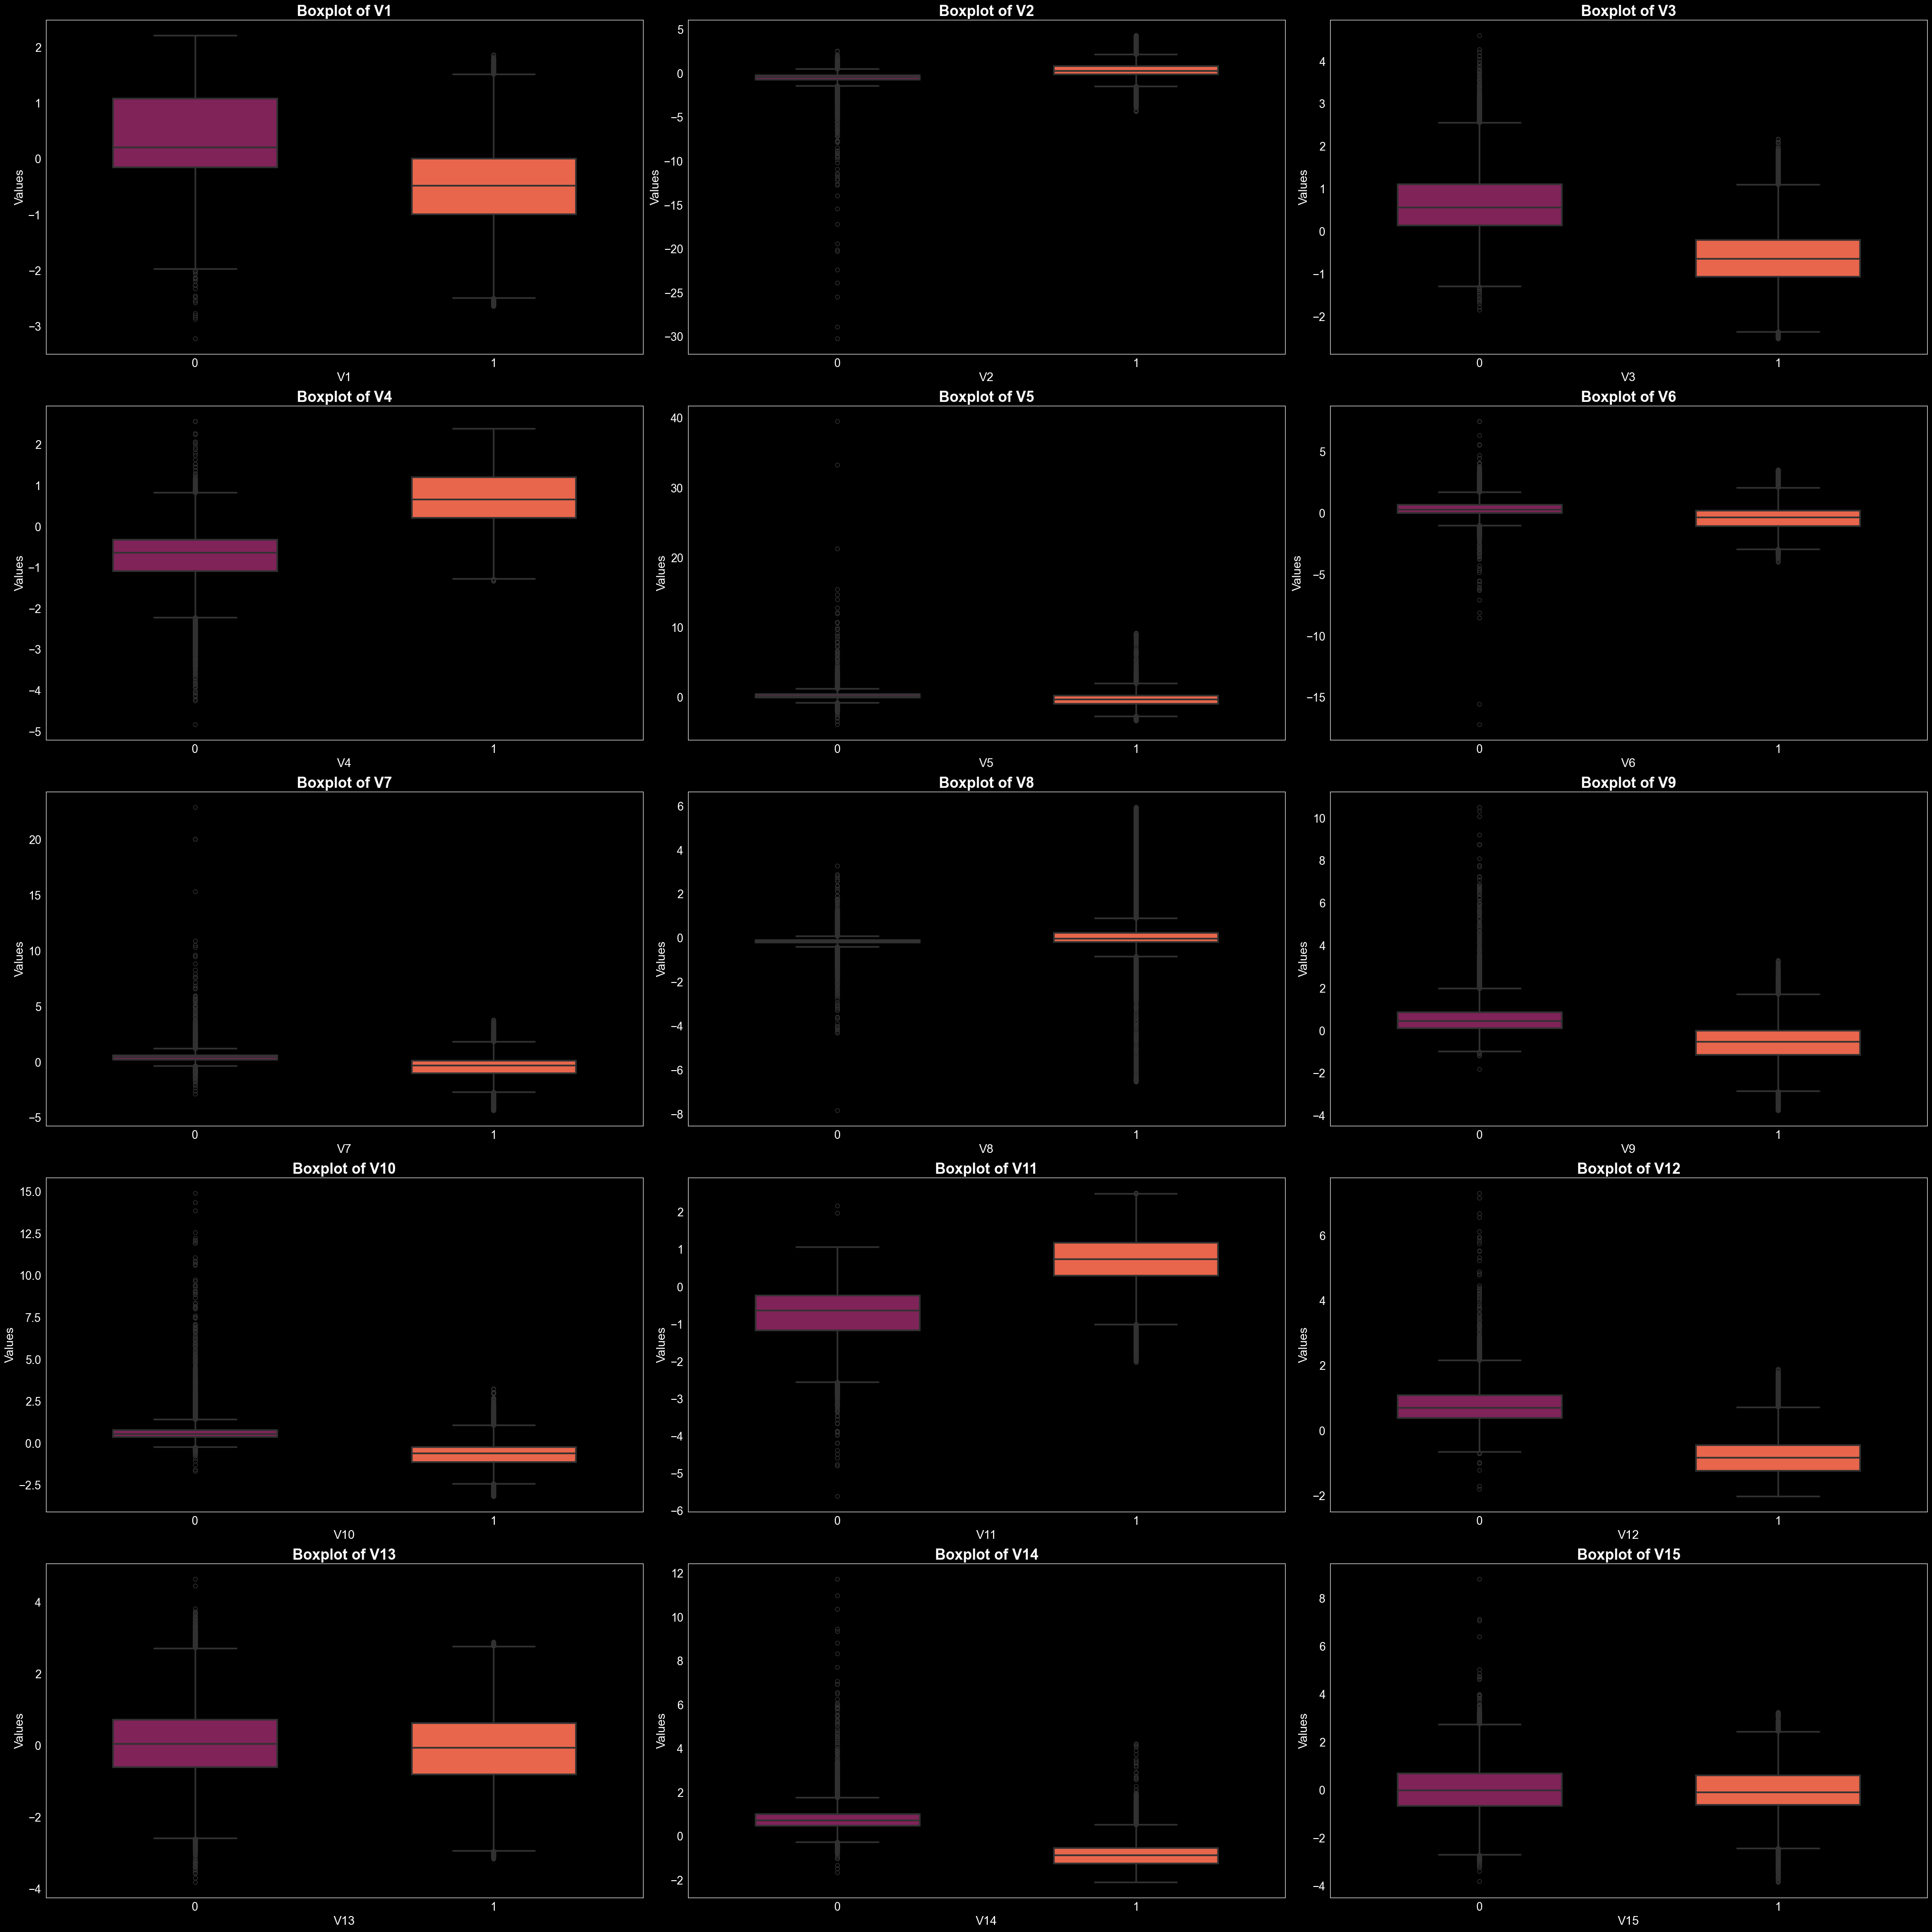

In [83]:
plot_box_1(eda_df)

In [84]:
#divide vis into 2 parts
def plot_box_2(df):
    numerical_cols = ['V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//3
    ncols = 3
    fig, axes = plt.subplots(figsize=(40,40),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//3
        col = i%3
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.boxplot(x='Class',y=column,data=df,palette='rocket', linewidth=2.5, saturation=0.9,ax=ax,width=0.55)
        ax.set_title(f'Boxplot of {column}', color='white', fontsize=22, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=18)
        ax.set_ylabel('Values', color='white', fontsize=18)
        
        ax.tick_params(axis='x', colors='white', labelsize=17)
        ax.tick_params(axis='y', colors='white', labelsize=17)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

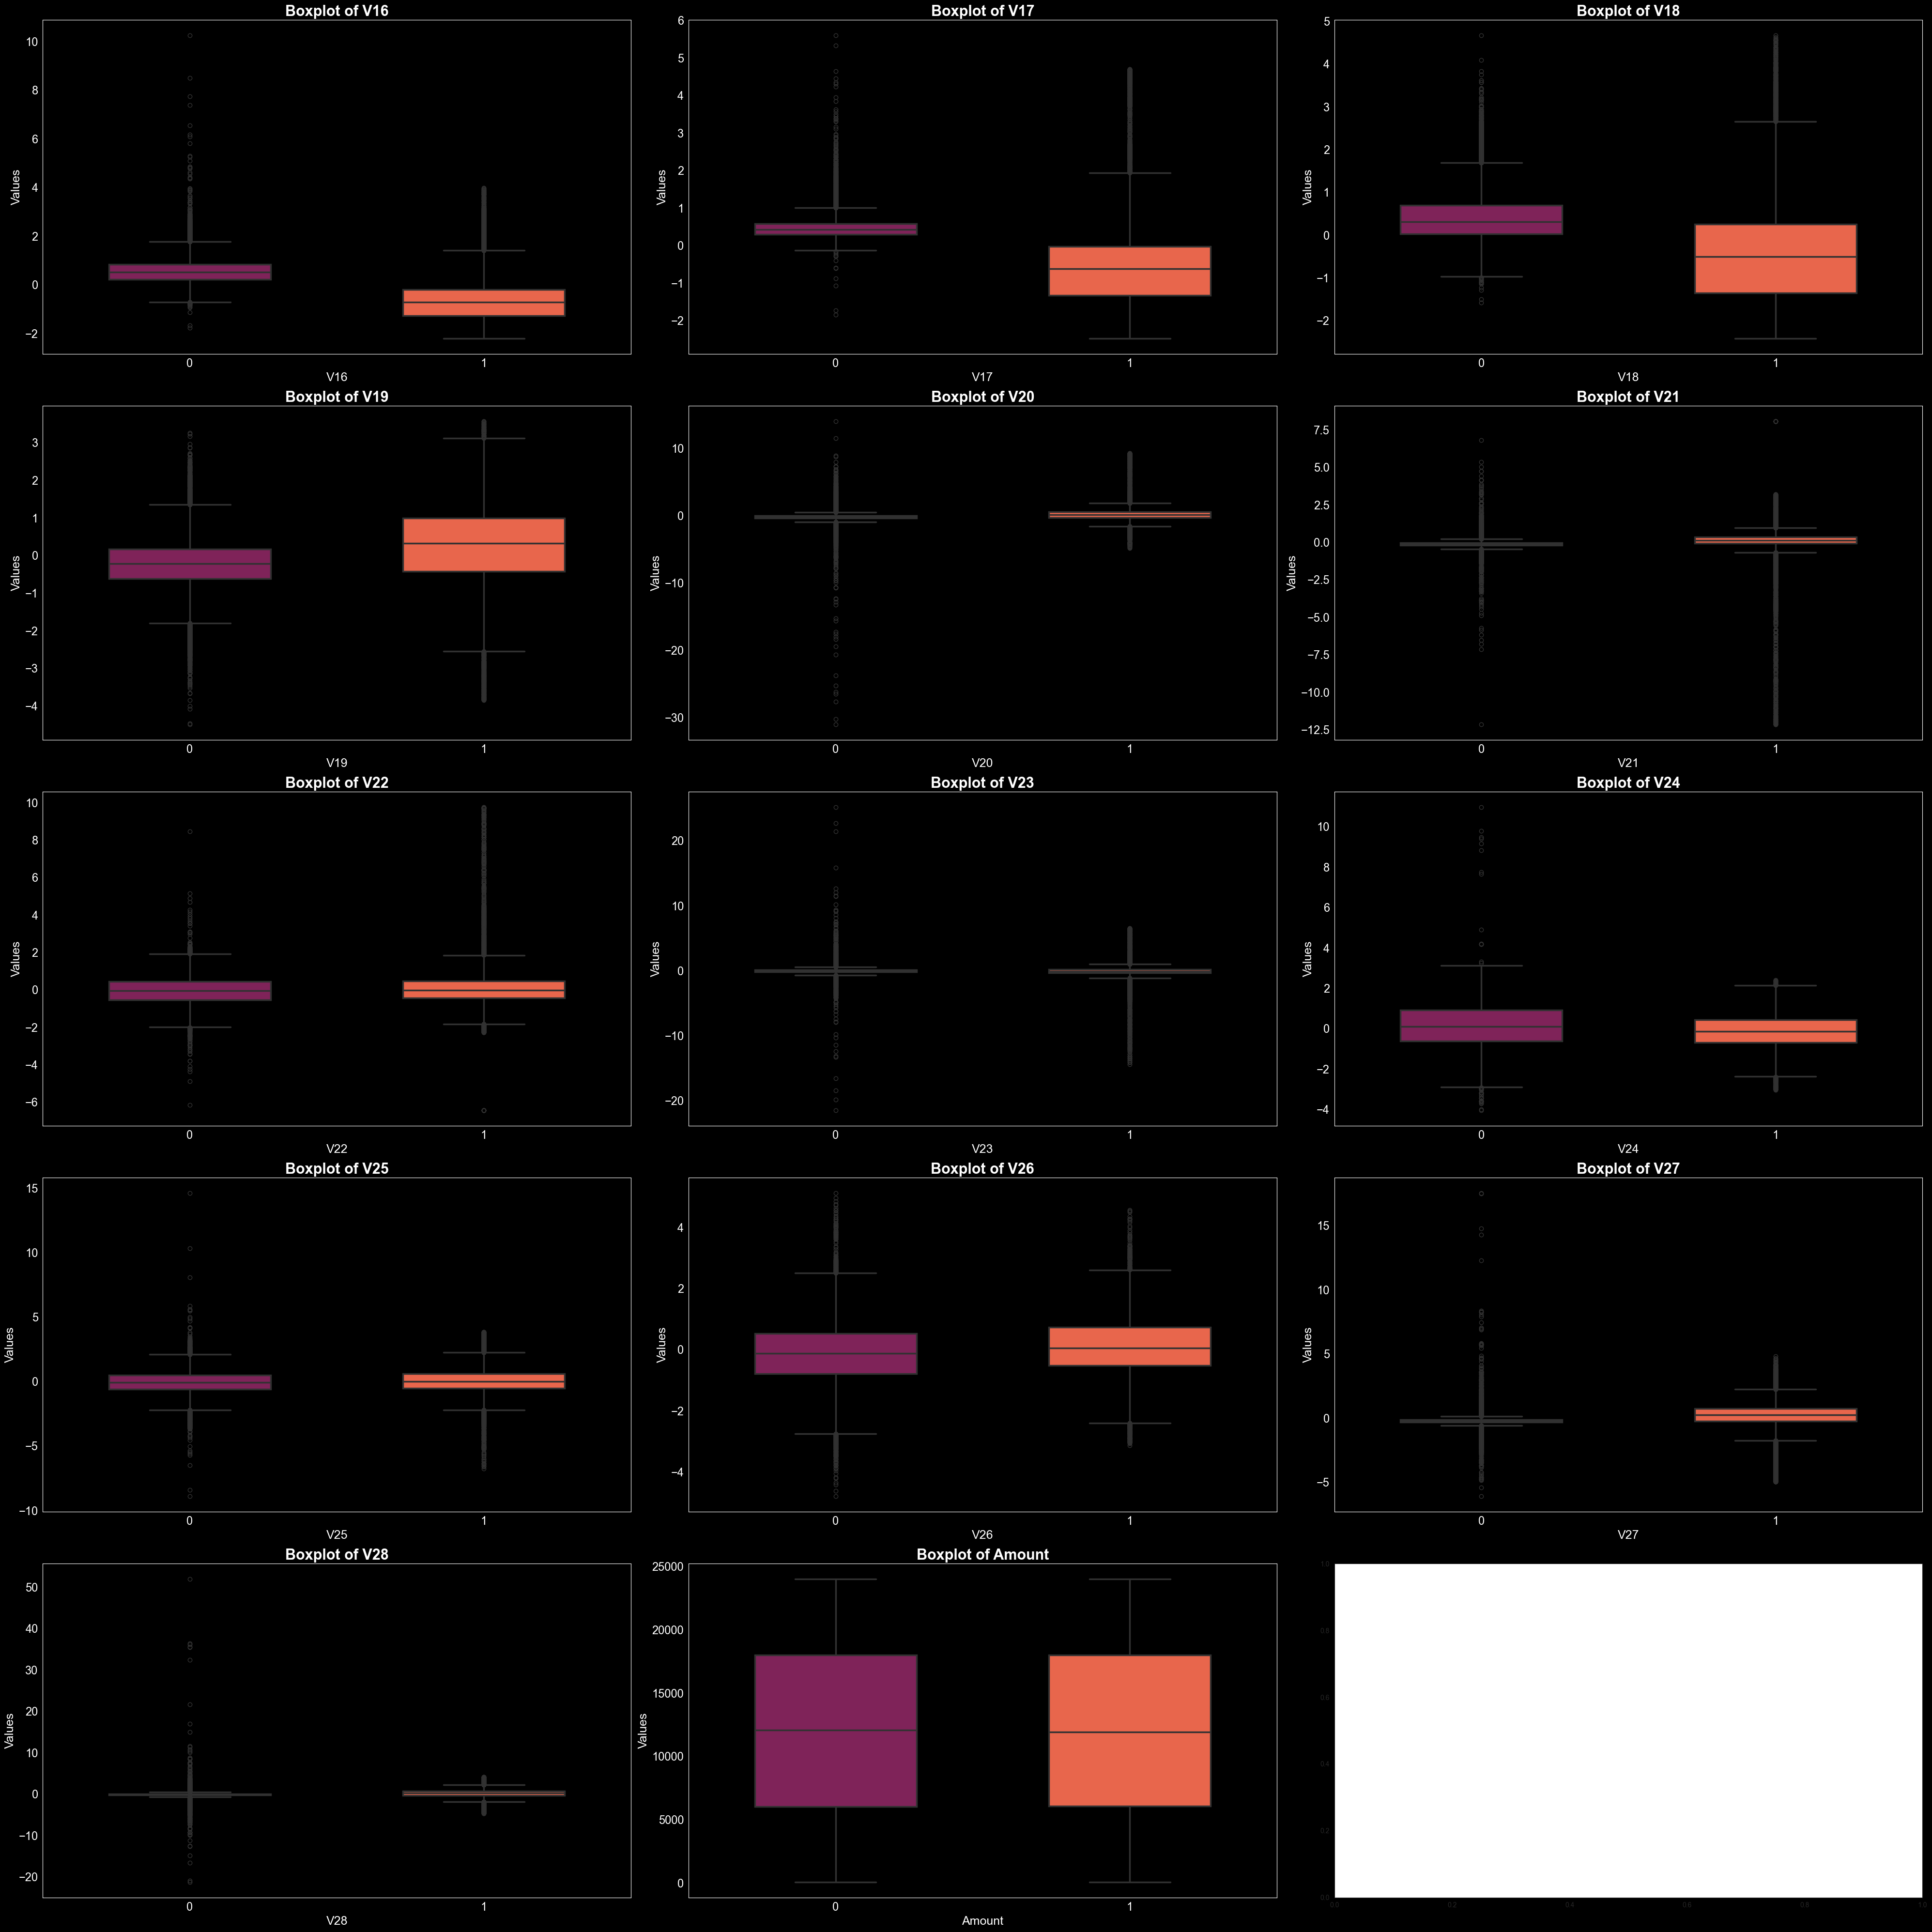

In [85]:
plot_box_2(eda_df)

In [92]:
#divide vis into 2 parts
def plot_hist_1(df):
    numerical_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//3
    ncols = 3
    fig, axes = plt.subplots(figsize=(40,40),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//3
        col = i%3
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.histplot(x=column,data=df,palette='rocket',hue='Class',ax=ax,kde=True)
        ax.set_title(f'Distplot of {column}', color='white', fontsize=22, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=18)
        ax.set_ylabel('Values', color='white', fontsize=18)
        
        ax.tick_params(axis='x', colors='white', labelsize=17)
        ax.tick_params(axis='y', colors='white', labelsize=17)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

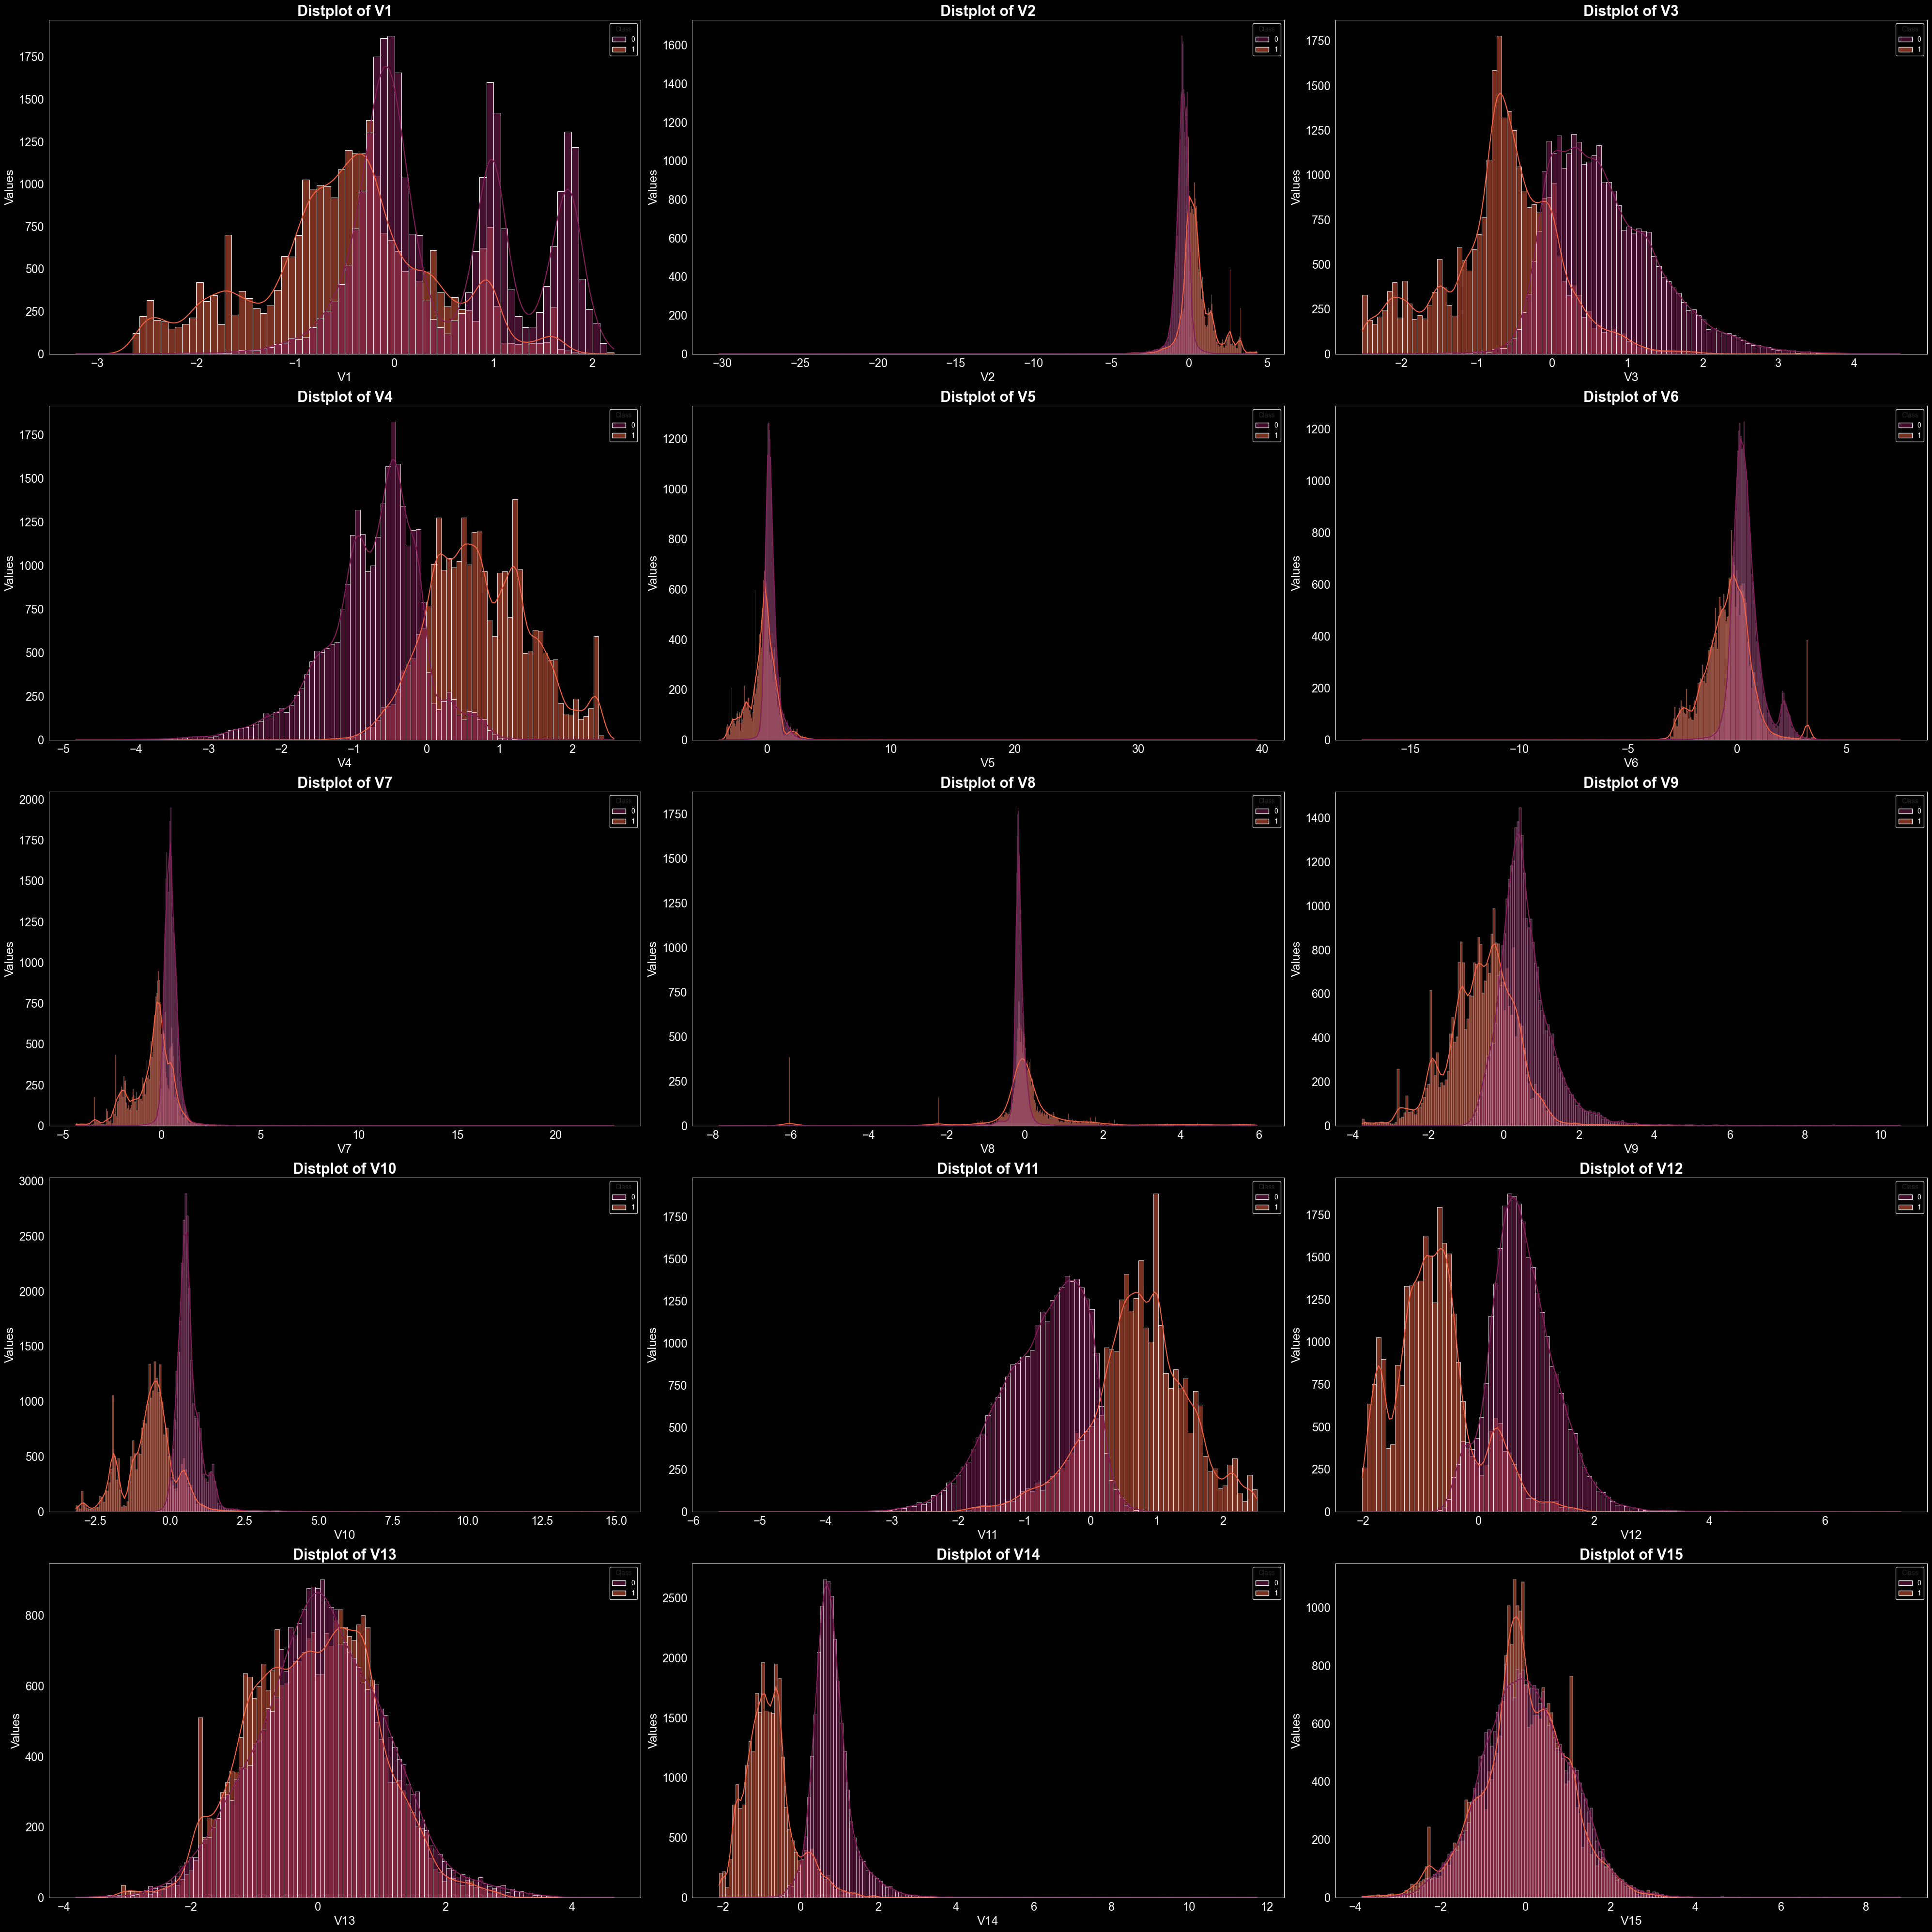

In [93]:
plot_hist_1(eda_df)

In [94]:
#divide vis into 2 parts
def plot_hist_2(df):
    numerical_cols = ['V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//3
    ncols = 3
    fig, axes = plt.subplots(figsize=(40,40),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//3
        col = i%3
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.histplot(x=column,data=df,palette='rocket',hue='Class',ax=ax,kde=True)
        ax.set_title(f'Distplot of {column}', color='white', fontsize=22, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=18)
        ax.set_ylabel('Values', color='white', fontsize=18)
        
        ax.tick_params(axis='x', colors='white', labelsize=17)
        ax.tick_params(axis='y', colors='white', labelsize=17)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

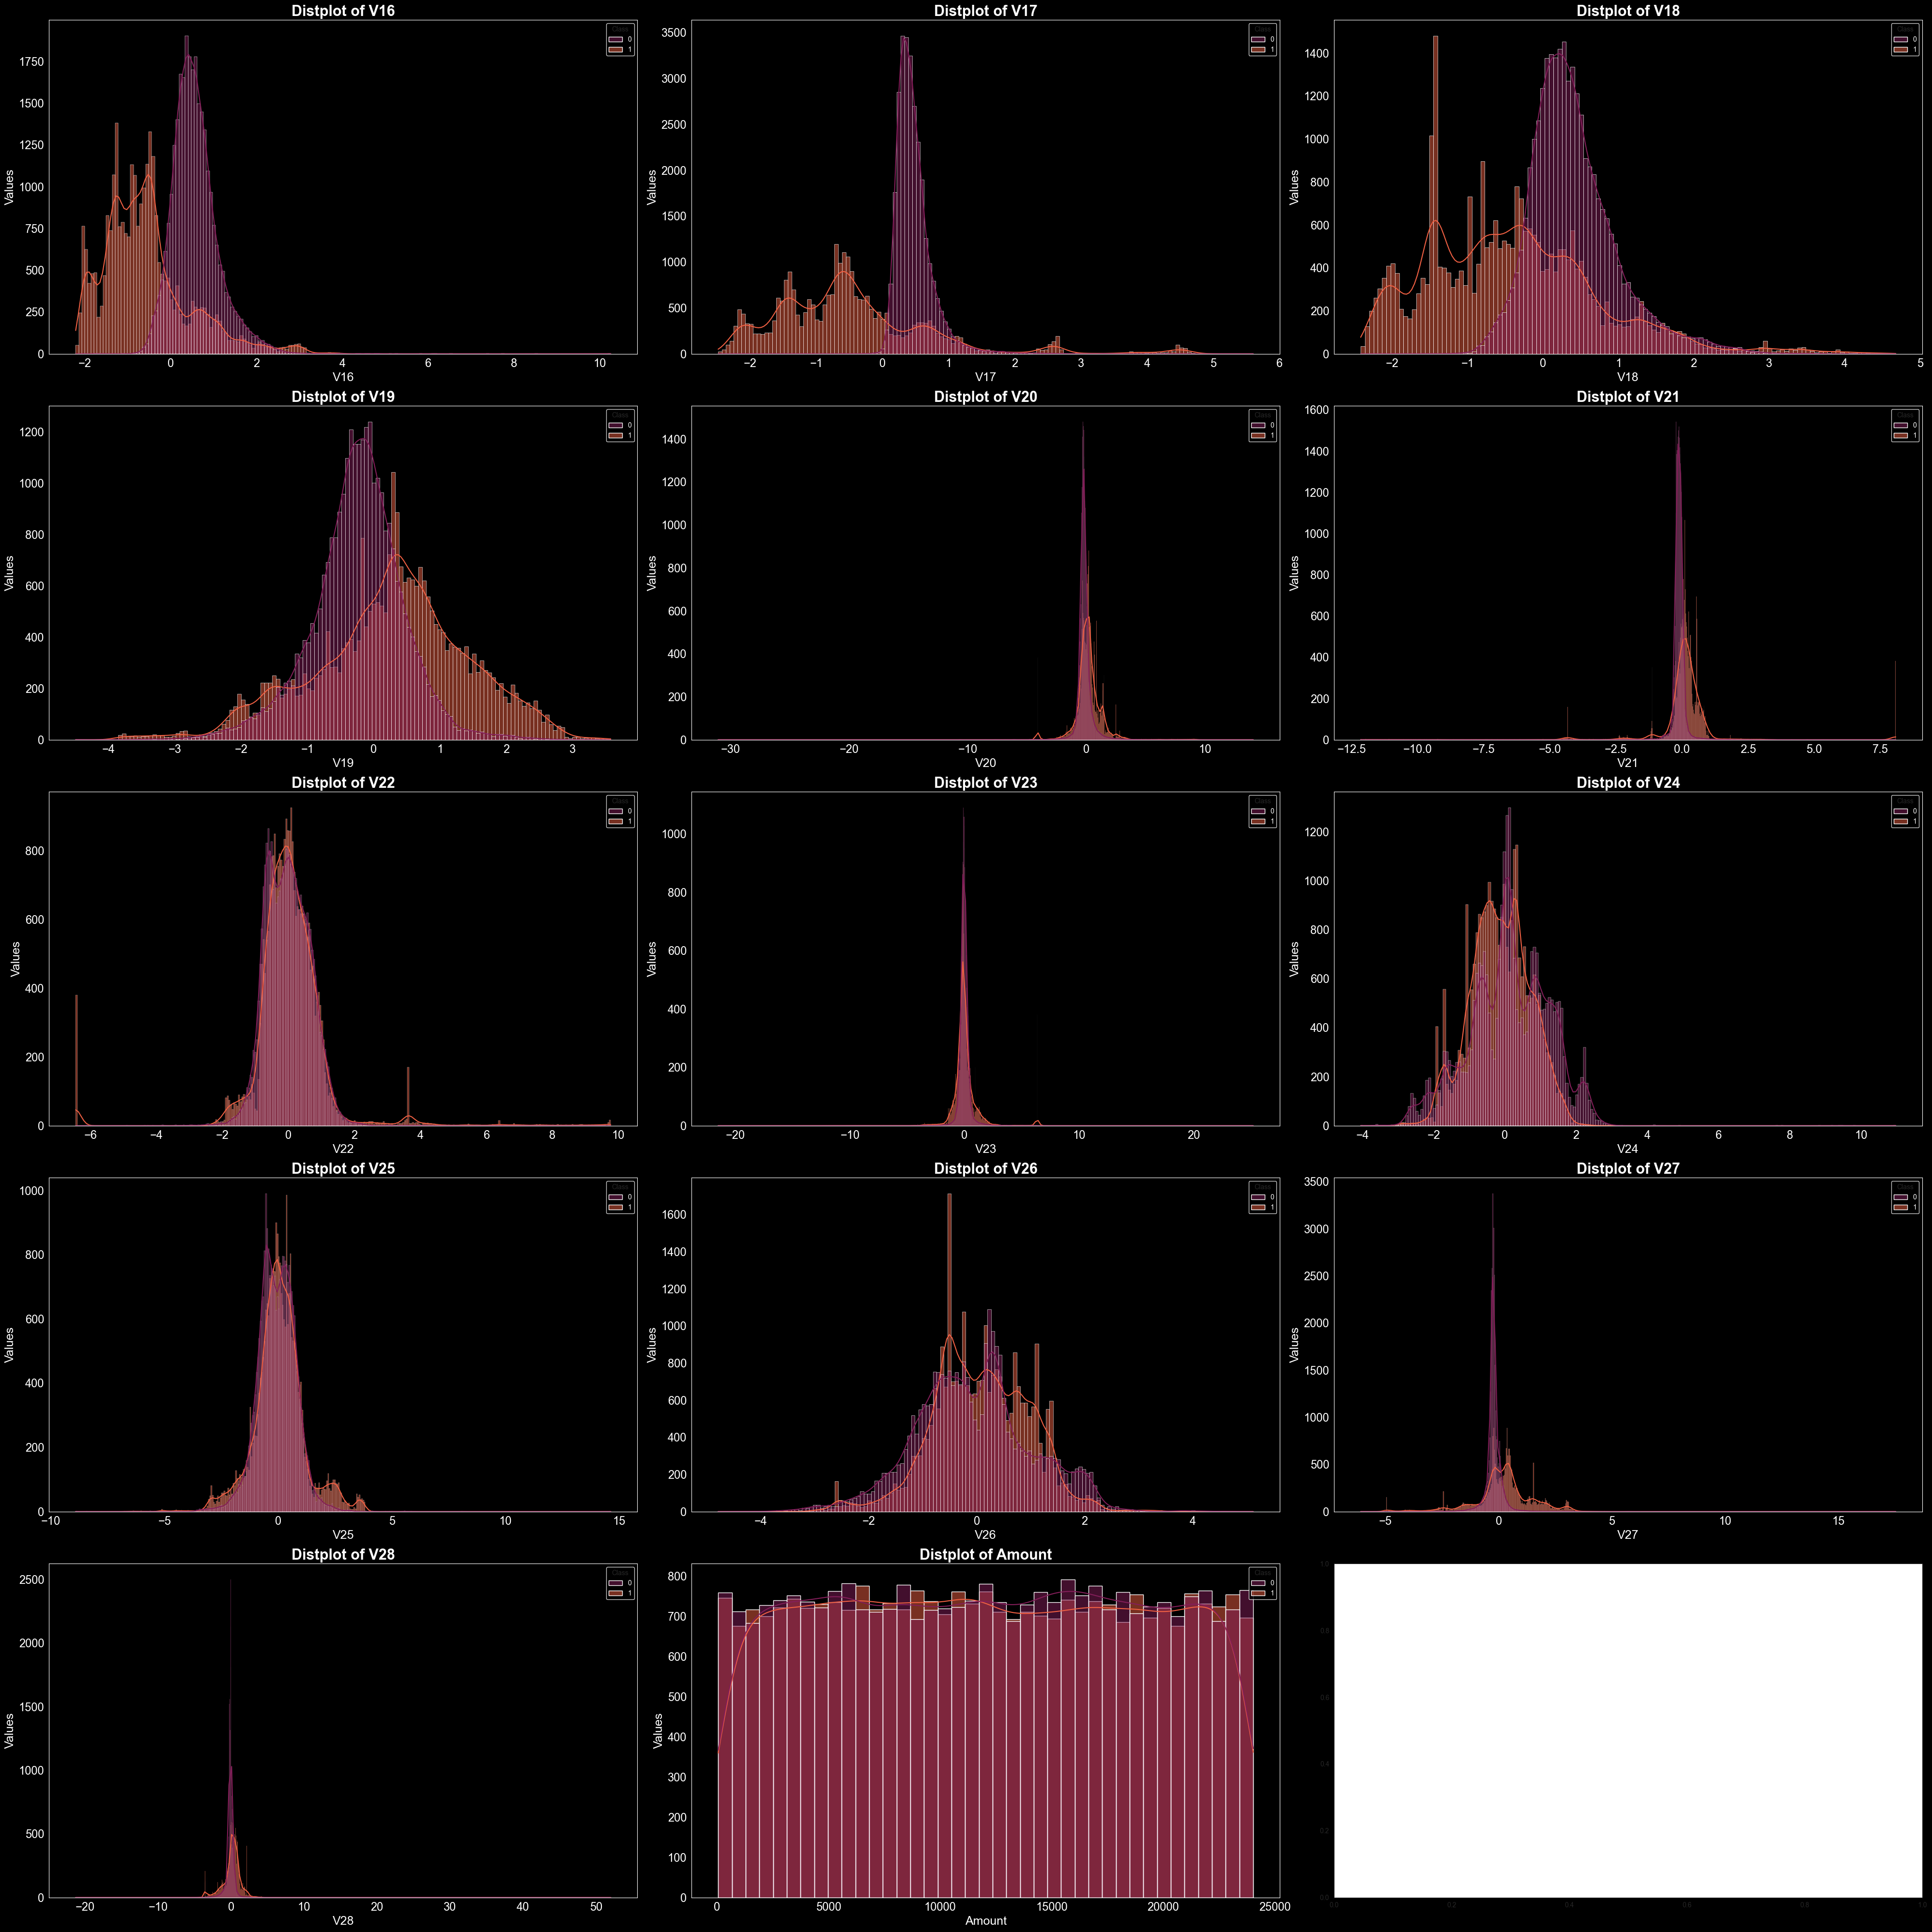

In [95]:
plot_hist_2(eda_df)

In [86]:
pd.DataFrame(df.corr()).style.background_gradient(cmap='viridis')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.561177,0.484495,-0.498963,0.517459,0.354727,0.573375,-0.226780,0.548974,0.599107,-0.525797,0.580720,-0.020576,0.494430,0.045999,0.621885,0.605798,0.577298,-0.377806,-0.219202,-0.034639,-0.073763,-0.068906,-0.014651,-0.008506,0.009282,-0.122782,0.070113,-0.001280,-0.505761
V2,-0.561177,1.000000,-0.627806,0.579635,-0.631664,-0.341018,-0.694015,0.191318,-0.585088,-0.621795,0.558863,-0.574940,0.012803,-0.523302,-0.161318,-0.534395,-0.495833,-0.482166,0.208824,0.263731,-0.013559,0.035346,0.151926,-0.027522,0.132443,0.012220,0.053859,0.021083,-0.000075,0.491879
V3,0.484495,-0.627806,1.000000,-0.687726,0.510349,0.508971,0.634336,-0.263035,0.648617,0.707677,-0.688435,0.705500,-0.019278,0.673180,0.098515,0.614502,0.578224,0.525511,-0.314398,-0.253838,-0.021684,-0.041998,-0.058876,0.076460,-0.076329,-0.052052,-0.190589,0.005353,-0.002001,-0.682095
V4,-0.498963,0.579635,-0.687726,1.000000,-0.429242,-0.474398,-0.588651,0.199019,-0.676649,-0.712838,0.708642,-0.722597,0.011520,-0.714845,-0.098629,-0.593945,-0.532787,-0.482267,0.269841,0.257257,-0.013106,0.091213,0.043264,-0.102508,0.029401,0.136675,0.188042,-0.011319,0.001859,0.735980
V5,0.517459,-0.631664,0.510349,-0.429242,1.000000,0.245182,0.586828,-0.314988,0.479610,0.563873,-0.440101,0.473006,-0.115322,0.387458,0.058680,0.596899,0.669626,0.645098,-0.438124,-0.246710,0.034144,-0.119159,-0.113919,-0.083240,-0.047847,0.047769,-0.043782,0.108416,-0.000016,-0.338639
V6,0.354727,-0.341018,0.508971,-0.474398,0.245182,1.000000,0.418712,-0.604506,0.432239,0.470993,-0.497603,0.498979,-0.117636,0.510102,-0.023848,0.415814,0.378151,0.328009,-0.235623,-0.188350,-0.040150,0.036898,0.308622,-0.005243,-0.195337,-0.067603,-0.260783,-0.065628,0.000735,-0.435080
V7,0.573375,-0.694015,0.634336,-0.588651,0.586828,0.418712,1.000000,-0.181021,0.601796,0.678010,-0.587660,0.603325,-0.030014,0.535615,0.135939,0.667247,0.655755,0.625685,-0.372274,-0.299492,0.019694,-0.104108,-0.111150,-0.004155,0.000808,-0.006480,-0.036546,0.040749,0.001326,-0.491233
V8,-0.226780,0.191318,-0.263035,0.199019,-0.314988,-0.604506,-0.181021,1.000000,-0.208562,-0.200000,0.223060,-0.211993,0.273946,-0.216398,0.101685,-0.230628,-0.277263,-0.249986,0.253276,0.131291,0.056482,-0.098817,-0.463652,0.083276,0.322645,0.040450,0.298410,0.046016,-0.000208,0.144298
V9,0.548974,-0.585088,0.648617,-0.676649,0.479610,0.432239,0.601796,-0.208562,1.000000,0.748489,-0.633557,0.667266,-0.006167,0.633210,0.114611,0.573952,0.581606,0.522722,-0.294434,-0.328989,0.131007,-0.204734,-0.042366,0.044005,-0.034884,-0.130996,-0.111858,0.069960,-0.001589,-0.585521
V10,0.599107,-0.621795,0.707677,-0.712838,0.563873,0.470993,0.678010,-0.200000,0.748489,1.000000,-0.713063,0.736784,-0.019248,0.698936,0.111055,0.686598,0.649148,0.596702,-0.375078,-0.287080,0.037450,-0.150984,-0.056281,0.045935,-0.014041,-0.053675,-0.134909,0.035654,-0.001259,-0.673663


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566813 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      566813 non-null  float16
 1   V2      566813 non-null  float16
 2   V3      566813 non-null  float16
 3   V4      566813 non-null  float16
 4   V5      566813 non-null  float16
 5   V6      566813 non-null  float16
 6   V7      566813 non-null  float16
 7   V8      566813 non-null  float16
 8   V9      566813 non-null  float16
 9   V10     566813 non-null  float16
 10  V11     566813 non-null  float16
 11  V12     566813 non-null  float16
 12  V13     566813 non-null  float16
 13  V14     566813 non-null  float16
 14  V15     566813 non-null  float16
 15  V16     566813 non-null  float16
 16  V17     566813 non-null  float16
 17  V18     566813 non-null  float16
 18  V19     566813 non-null  float16
 19  V20     566813 non-null  float16
 20  V21     566813 non-null  float16
 21  V22     566813 

### split data

In [105]:
from sklearn.model_selection import train_test_split
X = df.drop('Class',axis=1)
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.15)

### Scaling

In [106]:
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler()
X_train = sclr.fit_transform(X_train)
X_val = sclr.transform(X_val)
X_test = sclr.transform(X_test)

### Dtree

In [108]:
#base check model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56704
           1       1.00      1.00      1.00     56659

    accuracy                           1.00    113363
   macro avg       1.00      1.00      1.00    113363
weighted avg       1.00      1.00      1.00    113363



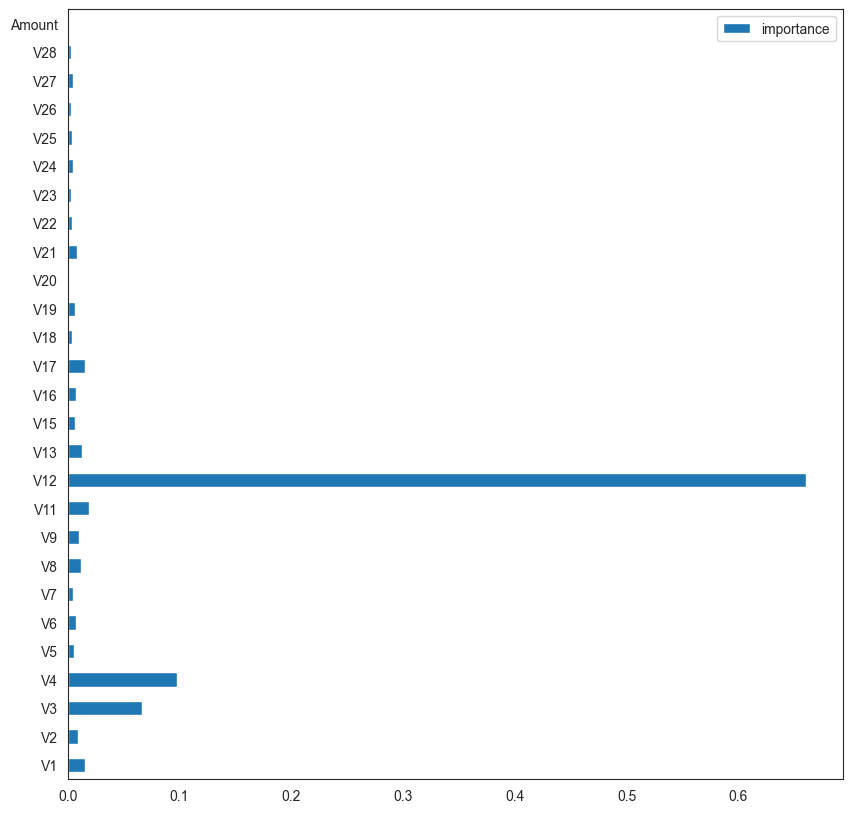

In [126]:
feature_df = pd.DataFrame(dtree.feature_importances_,columns=['importance'],index=X.columns)
feature_df.plot(kind='barh',figsize=(10,10))
plt.show()

In [124]:
X = df.drop('Class',axis=1)
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.15)
sclr = MinMaxScaler()
X_train = sclr.fit_transform(X_train)
X_val = sclr.transform(X_val)
X_test = sclr.transform(X_test)

In [125]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56832
           1       1.00      1.00      1.00     56531

    accuracy                           1.00    113363
   macro avg       1.00      1.00      1.00    113363
weighted avg       1.00      1.00      1.00    113363



### dataset isnt suitable for modelling rather is for vis purposes